In [1]:
!pip install import-ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=3329094af6b0faa43a56a8233952a99b97f5e8945ffc4fc8830e513626f27c70
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [ ]:
!pip install pytorch_lightning

     |████████████████████████████████| 317kB 4.4MB/s 
     |████████████████████████████████| 829kB 9.6MB/s 
     |████████████████████████████████| 276kB 22.0MB/s 
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=7a1fb0195277a2af57a97a10b940aaa53aca15e71e123089e6b80337bdaadd23
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=845f47ba08a6e18d543eeefca01359ff7cd508ba27b7d8e7643bb8de5558dc18
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built future PyYAML
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
import numpy as np

In [2]:
import os

In [3]:
os.getcwd()

'/content'

In [4]:
os.chdir('/content/drive/My Drive/Project')

In [5]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader, Dataset
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping
import random
import collections
import torchvision.transforms as transforms
from torch.optim import lr_scheduler
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.models as models
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import pandas as pd
import torch.nn.functional as F
import cv2
import import_ipynb

ModuleNotFoundError: ignored

In [ ]:
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
random_seed = 0

In [ ]:
torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

In [7]:
data_root = '/content/drive/My Drive/Project/data/ct_data'

In [8]:
save_root = '/content/drive/My Drive/Project/data/latent_variable/Clf/Radiogenomics+genomics_raiomics_LAUD+LSCC/fixed_val_idx'

In [9]:
train_x_before1 = np.load(data_root + '/RadioGenomics/pathological' + '/ct_total.npy')
train_y_before1 = np.load(data_root + '/RadioGenomics/pathological' + '/stage_total.npy')
train_x_before2 = np.load(data_root + '/Radiomics_genomics/pathological' + '/ct_total.npy')
train_y_before2 = np.load(data_root + '/Radiomics_genomics/pathological' + '/stage_total.npy')
test_x_before1 = np.load(data_root + '/CPTAC_LAUD/pathological' + '/ct_total.npy')
test_y_before1 = np.load(data_root + '/CPTAC_LAUD/pathological' + '/stage_total.npy')
test_x_before2 = np.load(data_root + '/CPTAC_LSCC/pathological' + '/ct_total.npy')
test_y_before2 = np.load(data_root + '/CPTAC_LSCC/pathological' + '/stage_total.npy')

In [10]:
train_x_before = np.append(train_x_before1, train_x_before2, axis = 0)
train_y_before = np.append(train_y_before1, train_y_before2, axis = 0)

In [11]:
test_x_before = np.append(test_x_before1, test_x_before2, axis = 0)
test_y_before = np.append(test_y_before1, test_y_before2, axis = 0)

In [12]:
train_y_before = train_y_before.astype('int')
test_y_before = test_y_before.astype('int')

In [13]:
len(test_y_before1)

17

In [14]:
len(test_y_before2)

20

In [17]:
print(len(np.where(test_y_before1 == 1)[0]))
print(len(np.where(test_y_before1 == 2)[0]))
print(len(np.where(test_y_before1 == 3)[0]))

12
4
1


In [ ]:
print(train_x_before.shape)
print(train_y_before.shape)
print(test_x_before.shape)
print(test_y_before.shape)

(98, 3, 128, 128)
(98,)
(37, 3, 128, 128)
(37,)


In [ ]:
train_one = len(np.where(train_y_before == 1)[0])
train_two = len(np.where(train_y_before == 2)[0])
train_three = len(np.where(train_y_before == 3)[0])
train_four = len(np.where(train_y_before == 4)[0])
print('one    :', train_one / len(train_y_before))
print('two    :', train_two / len(train_y_before))
print('three  :', train_three / len(train_y_before))
print('four   :', train_four / len(train_y_before))

one    : 0.6326530612244898
two    : 0.22448979591836735
three  : 0.11224489795918367
four   : 0.030612244897959183


In [ ]:
test_one = len(np.where(test_y_before == 1)[0])
test_two = len(np.where(test_y_before == 2)[0])
test_three = len(np.where(test_y_before == 3)[0])
test_four = len(np.where(test_y_before == 4)[0])
print('one    :', test_one / len(test_y_before))
print('two    :', test_two / len(test_y_before))
print('three  :', test_three / len(test_y_before))
print('four   :', test_four / len(test_y_before))

one    : 0.5405405405405406
two    : 0.40540540540540543
three  : 0.05405405405405406
four   : 0.0


In [ ]:
# label_one = np.where(train_y_before == 1)[0]
# label_other = np.where(train_y_before != 1)[0]
# val_one_idx = random.sample(list(label_one), 7)
# val_other_idx = random.sample(list(label_other), 5)
# val_one_idx.extend(val_other_idx)
# random.shuffle(val_one_idx)

In [ ]:
val_idx = [3, 12, 27, 52, 67, 79, 81, 88]

In [ ]:
train_idx = [i for i in range(len(train_x_before)) if i not in val_idx]

In [ ]:
train_x_re = train_x_before[train_idx]
train_y_re = train_y_before[train_idx]

In [ ]:
validation_x = train_x_before[val_idx]
validation_y = train_y_before[val_idx]

In [ ]:
validation_y

array([1, 1, 1, 2, 1, 1, 2, 3])

In [ ]:
print(train_x_re.shape)
print(train_y_re.shape)
print(validation_x.shape)
print(validation_y.shape)

(90, 3, 128, 128)
(90,)
(8, 3, 128, 128)
(8,)


In [ ]:
train_x = train_x_re.astype('float16')
train_y = train_y_re
val_x = validation_x.astype('float16')
val_y = validation_y
test_x = test_x_before.astype('float16')
test_y = test_y_before

In [ ]:
train_x_tr = torch.from_numpy(train_x).type(torch.FloatTensor)
train_y_tr = torch.from_numpy(train_y)
val_x_tr = torch.from_numpy(val_x).type(torch.FloatTensor)
val_y_tr = torch.from_numpy(val_y)
test_x_tr = torch.from_numpy(test_x).type(torch.FloatTensor)
test_y_tr = torch.from_numpy(test_y)

In [ ]:
print('train_x shape : ', train_x_tr.shape)
print('train_y shape : ', train_y_tr.shape)
print('val_x shape : ', val_x_tr.shape)
print('val_y shape : ', val_y_tr.shape)
print('test_x shape : ', test_x_tr.shape)
print('test_y shape : ', test_y_tr.shape)

train_x shape :  torch.Size([90, 3, 128, 128])
train_y shape :  torch.Size([90])
val_x shape :  torch.Size([8, 3, 128, 128])
val_y shape :  torch.Size([8])
test_x shape :  torch.Size([37, 3, 128, 128])
test_y shape :  torch.Size([37])


In [ ]:
batch_size = 8
noise_factor = 0.1
momentum = 0.9
learning_rate = 1e-2
num_epochs = 300

In [ ]:
class Dataset(Dataset):
    def __init__(self, images, label):
        self.labels = label
        self.images = images
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        X = self.images[index]
        y = self.labels[index]
        return X, y

In [ ]:
training_set = Dataset(train_x_tr, train_y_tr)
train_loader = DataLoader(training_set, batch_size = batch_size, shuffle=True)
batch_len_train = len(train_loader)

In [ ]:
test_set = Dataset(test_x_tr, test_y_tr)
test_loader = DataLoader(test_set, batch_size = batch_size, shuffle = True)
batch_len_test = len(test_loader)

In [ ]:
class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels , in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)


    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        # if you have padding issues, see
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)

In [ ]:
class DoubleConv_f(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1),
        )

    def forward(self, x):
        return self.double_conv(x)

In [ ]:
class Down_f(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )
        self.maxpool_conv_f = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv_f(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x), self.maxpool_conv_f(x)

In [ ]:
# class UNet(nn.Module):
#     def __init__(self, n_channels, n_classes, bilinear=True):
#         super(UNet, self).__init__()
#         self.n_channels = n_channels
#         self.n_classes = n_classes
#         self.bilinear = bilinear

#         self.inc = DoubleConv(n_channels, 64)
#         self.down1 = Down(64, 128)
#         self.down2 = Down(128, 256)
#         factor = 2 if bilinear else 1
#         self.down3 = Down_f(256, 512 // factor)

#         self.up2 = Up(512, 256 // factor, bilinear)
#         self.up3 = Up(256, 128 // factor, bilinear)
#         self.up4 = Up(128, 64, bilinear)
#         self.outc = OutConv(64, n_classes)

#     def forward(self, x):
#         x1 = self.inc(x)
#         x2 = self.down1(x1)
#         x3 = self.down2(x2)
#         x4, latent_variable = self.down3(x3)
#         x = self.up2(x4, x3)
#         x = self.up3(x, x2)
#         x = self.up4(x, x1)
#         logits = self.outc(x)
#         return logits, latent_variable

In [ ]:
class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=True):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        factor = 2 if bilinear else 1
        self.down4 = Down_f(512, 1024 // factor)

        self.up1 = Up(1024, 512 // factor, bilinear)
        self.up2 = Up(512, 256 // factor, bilinear)
        self.up3 = Up(256, 128 // factor, bilinear)
        self.up4 = Up(128, 64, bilinear)
        self.outc = OutConv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5, lv = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits, lv

In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), save_root + '/checkpoint.pth')
        self.val_loss_min = val_loss

In [ ]:
my_autoencoder = UNet(3, 3)
my_autoencoder.cuda();

In [ ]:
early_stopping = EarlyStopping(patience = 10, verbose = True)

In [ ]:
criterion = nn.MSELoss() 
optimizer = torch.optim.SGD(my_autoencoder.parameters(),lr = learning_rate, momentum = momentum)

In [ ]:
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=30, threshold=0.0001)

In [ ]:
for epoch in range(num_epochs):
    epoch_loss_train = 0.0

    my_autoencoder.train()
    for train_x_batch, train_y in train_loader:
        train_x = Variable(train_x_batch).cuda()
        train_x_noise = Variable(train_x_batch + noise_factor*torch.randn(train_x_batch.shape)).cuda()
        
        optimizer.zero_grad()
        
        train_output, train_lv = my_autoencoder(train_x_noise)
        train_epoch_loss = criterion(train_output, train_x)
        
        train_epoch_loss.backward()
        
        epoch_loss_train += (train_epoch_loss.data.item() * len(train_x_batch))
        
        optimizer.step()
        
    train_loss = epoch_loss_train / len(train_x_tr)
    scheduler.step(train_loss)

    with torch.no_grad():
      epoch_loss_val = 0.0
      epoch_loss_test = 0.0

      my_autoencoder.eval()

      val_x = Variable(val_x_tr).cuda()
      val_x_noise = Variable(val_x_tr + noise_factor*torch.randn(val_x_tr.shape)).cuda()

      val_output, val_lv = my_autoencoder(val_x_noise)
      val_epoch_loss = criterion(val_output, val_x)

      val_loss = val_epoch_loss.data.item()

      for test_x_batch, test_y_batch in test_loader:

        test_x = Variable(test_x_batch).cuda()
        test_x_noise = Variable(test_x_batch + noise_factor*torch.randn(test_x_batch.shape)).cuda()

        test_output, test_lv = my_autoencoder(test_x_noise)
        test_epoch_loss = criterion(test_output, test_x)

        epoch_loss_test += (test_epoch_loss.data.item() * len(test_x_batch))

      test_loss = epoch_loss_test / len(test_x_tr)

    early_stopping(val_loss, my_autoencoder)

    if (epoch + 1) == 1 :
        print('Epoch [{}/{}], Train loss : {:.4f}, val loss : {:.4f}, test loss : {:.4f}'.format(epoch+1, num_epochs, train_loss, val_loss, test_loss))
        
        
    if (epoch + 1) % 10 == 0 :
        print('Epoch [{}/{}], Train loss : {:.4f}, val loss : {:.4f}, test loss : {:.4f}'.format(epoch+1, num_epochs, train_loss, val_loss, test_loss))

Validation loss decreased (inf --> 0.026288).  Saving model ...
Epoch [1/300], Train loss : 0.1111, val loss : 0.0263, test loss : 0.0268
Validation loss decreased (0.026288 --> 0.021026).  Saving model ...
Validation loss decreased (0.021026 --> 0.009316).  Saving model ...
Validation loss decreased (0.009316 --> 0.006571).  Saving model ...
Validation loss decreased (0.006571 --> 0.004766).  Saving model ...
Validation loss decreased (0.004766 --> 0.004047).  Saving model ...
Validation loss decreased (0.004047 --> 0.003823).  Saving model ...
Validation loss decreased (0.003823 --> 0.003256).  Saving model ...
Validation loss decreased (0.003256 --> 0.002811).  Saving model ...
Validation loss decreased (0.002811 --> 0.002538).  Saving model ...
Epoch [10/300], Train loss : 0.0025, val loss : 0.0025, test loss : 0.0026
Validation loss decreased (0.002538 --> 0.002312).  Saving model ...
Validation loss decreased (0.002312 --> 0.002209).  Saving model ...
Validation loss decreased (0

In [ ]:
fname = save_root + '/checkpoint.pth'
checkpoint = torch.load(fname)
my_autoencoder.load_state_dict(checkpoint)

<All keys matched successfully>

In [ ]:
with torch.no_grad():
  epoch_loss_train = 0.0
  train_latent_variable = np.array([]).reshape(0, 512, 8, 8)
  train_label = np.array([])

  epoch_loss_val = 0.0
  val_latent_variable = np.array([]).reshape(0, 512, 8, 8)
  val_label = np.array([])

  epoch_loss_test = 0.0
  test_latent_variable = np.array([]).reshape(0, 512, 8, 8)
  test_label = np.array([])

  my_autoencoder.eval()

  for train_x_batch, train_y in train_loader:
    train_x = Variable(train_x_batch).cuda()
    train_x_noise = Variable(train_x_batch + noise_factor*torch.randn(train_x_batch.shape)).cuda()
    
    train_output, train_lv = my_autoencoder(train_x_noise)
    train_lv = train_lv.detach().cpu().numpy()
    train_latent_variable = np.append(train_latent_variable, train_lv, axis = 0)
    train_label = np.append(train_label, train_y)
    train_epoch_loss = criterion(train_output, train_x)
    
    epoch_loss_train += (train_epoch_loss.data.item() * len(train_x_batch))

  train_loss = epoch_loss_train / len(train_x_tr)

  val_x = Variable(val_x_tr).cuda()
  val_x_noise = Variable(val_x_tr + noise_factor*torch.randn(val_x_tr.shape)).cuda()

  val_output, val_lv = my_autoencoder(val_x_noise)
  val_lv = val_lv.detach().cpu().numpy()
  val_latent_variable = np.append(val_latent_variable, val_lv, axis = 0)
  val_label = np.append(val_label, val_y_tr)
  val_epoch_loss = criterion(val_output, val_x)

  val_loss = val_epoch_loss.data.item()

  for test_x_batch, test_y_batch in test_loader:

    test_x = Variable(test_x_batch).cuda()
    test_x_noise = Variable(test_x_batch + noise_factor*torch.randn(test_x_batch.shape)).cuda()

    test_output, test_lv = my_autoencoder(test_x_noise)
    test_lv = test_lv.detach().cpu().numpy()
    test_latent_variable = np.append(test_latent_variable, test_lv, axis = 0)
    test_label = np.append(test_label, test_y_batch)
    test_epoch_loss = criterion(test_output, test_x)

    epoch_loss_test += (test_epoch_loss.data.item() * len(test_x_batch))

  test_loss = epoch_loss_test / len(test_x_tr)

print('Train loss : {:.7f}, val loss : {:.7f}, test loss : {:.7f}'.format(train_loss, val_loss, test_loss))

Train loss : 0.0006079, val loss : 0.0006068, test loss : 0.0006540


In [ ]:
train_x_np = train_x.detach().cpu().numpy()
train_x_noise_np = train_x_noise.detach().cpu().numpy()
train_output_np = train_output.detach().cpu().numpy()

In [ ]:
train_x_re = train_x_np.transpose(0, 2, 3, 1)
train_x_noise_re = train_x_noise_np.transpose(0, 2, 3, 1)
train_output_re = train_output_np.transpose(0, 2, 3, 1)

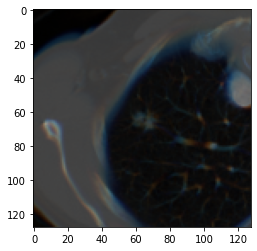

In [ ]:
plt.imshow(train_x_re[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


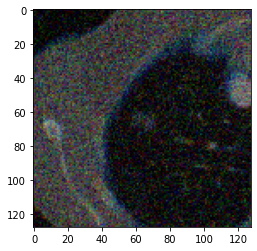

In [ ]:
plt.imshow(train_x_noise_re[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


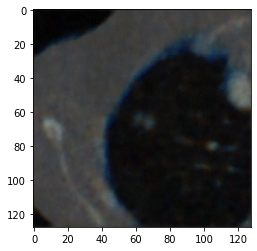

In [ ]:
plt.imshow(train_output_re[0])

In [ ]:
val_x_np = val_x.detach().cpu().numpy()
val_x_noise_np = val_x_noise.detach().cpu().numpy()
val_output_np = val_output.detach().cpu().numpy()

In [ ]:
val_x_re = val_x_np.transpose(0, 2, 3, 1)
val_x_noise_re = val_x_noise_np.transpose(0, 2, 3, 1)
val_x_output_re = val_output_np.transpose(0, 2, 3, 1)

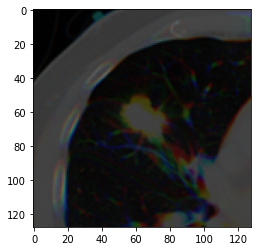

In [ ]:
plt.imshow(val_x_re[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


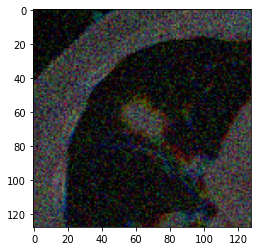

In [ ]:
plt.imshow(val_x_noise_re[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


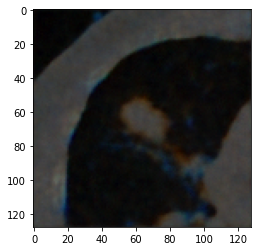

In [ ]:
plt.imshow(val_x_output_re[0])

In [ ]:
test_x_np = test_x.detach().cpu().numpy()
test_x_noise_np = test_x_noise.detach().cpu().numpy()
test_output_np = test_output.detach().cpu().numpy()

In [ ]:
test_x_re = test_x_np.transpose(0, 2, 3, 1)
test_x_noise_re = test_x_noise_np.transpose(0, 2, 3, 1)
test_x_output_re = test_output_np.transpose(0, 2, 3, 1)

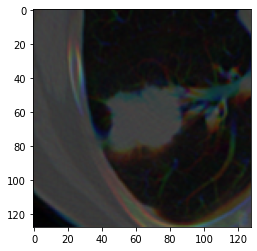

In [ ]:
plt.imshow(test_x_re[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


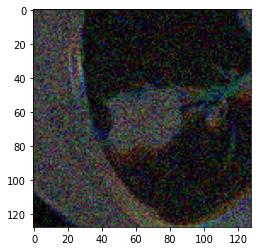

In [ ]:
plt.imshow(test_x_noise_re[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


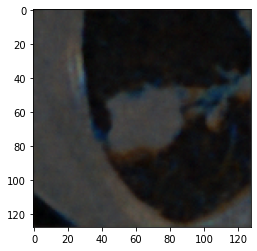

In [ ]:
plt.imshow(test_x_output_re[0])

In [ ]:
np.save(save_root + '/training_latent_variable_noBatchNorm.npy', train_latent_variable)
np.save(save_root + '/training_latent_variable_stage_noBatchNorm.npy', train_label)
np.save(save_root + '/validation_latent_variable_noBatchNorm.npy', val_latent_variable)
np.save(save_root + '/validation_latent_variable_stage_noBatchNorm.npy', val_label)
np.save(save_root + '/test_latent_variable_noBatchNorm.npy', test_latent_variable)
np.save(save_root + '/test_latent_variable_stage_noBatchNorm.npy', test_label)